# Natural Language Processing

<div class="alert alert-success">
Natural Language Processing (NLP) is the approach of analyzing text data, with computers.
</div>

<div class="alert alert-info">
Natural Language Processing on 
<a href="https://en.wikipedia.org/wiki/Natural-language_processing" class="alert-link">wikipedia</a>.
</div>

## NTLK: Natural Language Tool Kit

<div class="alert alert-success">
NLTK is the main Python module for text-analysis. 
</div>

<div class="alert alert-info">
The NLTK organization website is 
<a href="http://www.nltk.org/" class="alert-link">here</a>
and they have a whole book of tutorials 
<a href="http://www.nltk.org/book/" class="alert-link">here</a>.
</div>

#### NLTK

NLTK provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum. 

In [2]:
# Import NLTK
import nltk

In this notebook, we will walk through some basic text-analysis using some useful functions from the NLTK package.

To work with text-data, you often need corpora - text datasets to compare to. NLTK has many such datasets available, but doesn't install them by default (as the full set of them would be quite large). Below we will download some of these datasets. 

In [3]:
# If you hit an error downloading things in the cell below, come back to this cell, uncomment it, and run this code.
#   This code gives python permission to write to your disk (if it doesn't already have persmission to do so).
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [4]:
# Download some useful data files from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to /Users/tom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tom/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/tom/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/tom/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /Users/tom/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [5]:
# Set some test sentences of data to play with
sentence = "UC San Diego is a great place to study cognitive science."

## Tokenisation

<div class="alert alert-success">
Tokenization is the process of splitting text data into 'tokens', which are meaningful pieces of data.
</div>

<div class="alert alert-info">
More information on tokenization
<a href="https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html" class="alert-link">here</a>.
</div>

Tokenization can be done at different levels - you can, for example tokenize text into sentences, and/or into words. 

In [6]:
# Tokenize our sentence, at the word level
tokens = nltk.word_tokenize(sentence)

In [7]:
# Check out the word-tokenized data
print(tokens)

['UC', 'San', 'Diego', 'is', 'a', 'great', 'place', 'to', 'study', 'cognitive', 'science', '.']


## Part-of-speech (POS) Tagging

<div class="alert alert-success">
Part-of-Speech tagging is the process of labelling words with respect to their 'types' and relationships to other words.
</div>

<div class="alert alert-info">
Part-of-speech tagging on 
<a href="https://en.wikipedia.org/wiki/Part-of-speech_tagging" class="alert-link">wikipedia</a>.
</div>

In [8]:
# Apply part-of-speech tagging to our sentence
tags = nltk.pos_tag(tokens)

In [9]:
# Check the POS tags for our data
print(tags)

[('UC', 'NNP'), ('San', 'NNP'), ('Diego', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('place', 'NN'), ('to', 'TO'), ('study', 'VB'), ('cognitive', 'JJ'), ('science', 'NN'), ('.', '.')]


In [10]:
# Check the documentation that describes what all of the abbreviations mean
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## Named Entity Recognition (NER)

<div class="alert alert-success">
Named entity recognition seeks to label words with the kinds of entities that they relate to.
</div>

<div class="alert alert-info">
Named entity recognition on 
<a href="https://en.wikipedia.org/wiki/Named-entity_recognition" class="alert-link">wikipedia</a>.
</div>

In [11]:
# Apply named entity recognition to our POS tags
entities = nltk.chunk.ne_chunk(tags)

In [12]:
# Check out the named entities
print(entities)

(S
  UC/NNP
  (PERSON San/NNP Diego/NNP)
  is/VBZ
  a/DT
  great/JJ
  place/NN
  to/TO
  study/VB
  cognitive/JJ
  science/NN
  ./.)


## Stop words

<div class="alert alert-success">
'Stop words' are the most common words of a language, that we often want to filter out before text analysis. 
</div>

<div class="alert alert-info">
Stop words on 
<a href="https://en.wikipedia.org/wiki/Stop_words" class="alert-link">wikipedia</a>.
</div>

In [13]:
# Check out the corpus of stop words in English
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Text Encoding

One of the key components of NLP, is deciding how to encode the text data. 

Common encodings are:
- Bag of Words (BoW)
    - Text is encoded as a collection of words & frequencies
- Term Frequency / Inverse Document Frequency (TF/IDF)
    - TF/IDF is a weighting that stores words with relation to their commonality across a corpus.

We will walk through an example of encoding text as BoW and TF-IDF.

In [14]:
# Imports
%matplotlib inline

# Standard Python has some useful string tools
import string

# Collections is a part of standard Python, with some useful data objects
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn has some useful NLP tools, such as a TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

The data we will be looking at is a small subset of the BookCorpus dataset. The original dataset can be found here: http://yknzhu.wixsite.com/mbweb.

The original dataset was collected from more than 11,000 books, and has already been tokenised at both the sentence and word level. The small subset provided and used here contains the first 10,000 sentences.

In [15]:
# Load the data
with open('files/book10k.txt', 'r') as f:
    sents = f.readlines()

In [16]:
# Check out the data - print out the first and last sentences, as examples
print(sents[0])
print(sents[-1])

the half-ling book one in the fall of igneeria series kaylee soderburg copyright 2013 kaylee soderburg all rights reserved .

alejo was sure the fact that he was nervously repeating mass along with five wrinkly , age-encrusted spanish women meant that stalin was rethinking whether he was going to pay the price .



In [17]:
# Preprocessing: Strip all extra whitespace from the sentences
sents = [sent.strip() for sent in sents]

We first take a look at the word frequency in the document, and print out top 10 most frequently appeared words with their frequencies.

In [18]:
# Tokenize all the sentences into words
#  This collects all the word tokens together into one big list
tokens = []
for x in sents:
    tokens.extend(nltk.word_tokenize(x))

In [19]:
# Check out how many words are in the data
print('Number of words in the data: \t', len(tokens))
print('Number of unique words: \t', len(set(tokens)))

Number of words in the data: 	 140060
Number of unique words: 	 8221


In [20]:
# Use the 'counter' object to count how many times each word appears
counts = Counter(tokens)

In [30]:
# Check out the counts object
#  This is basically a 'bag-of-words' representation of this corpus
#  We have lost word order and grammar - it's just a collection of words
#  What we do have is a list of all the words present, and how often they appear
counts

One thing you might notice if you scroll through the word list above is that it still contains punctuation. Let's remove those.

In [21]:
# The 'string' module (standard library) has a useful list of punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
# Drop all punction markers from the counts object
for punc in string.punctuation:
    if punc in counts:
        counts.pop(punc)

In [23]:
# Get the top 10 most frequent words
top10 = counts.most_common(10)

In [24]:
# Extract the top words, and counts
top10_words = [it[0] for it in top10]
top10_counts = [it[1] for it in top10]

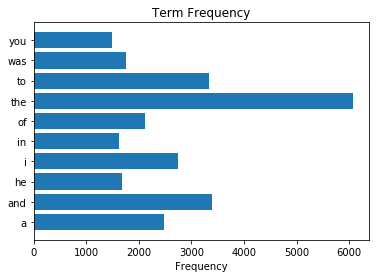

In [25]:
# Plot a barplot of the most frequent words in the text
plt.barh(top10_words, top10_counts)
plt.title('Term Frequency');
plt.xlabel('Frequency');

As we can see, 'the', 'was', 'a', etc. appear a lot in the document. 

These frequently appearing words aren't really that useful to figure out what these documents are about, or as a way to use and understand this text data.  

In [26]:
# Drop all stop words
for stop in nltk.corpus.stopwords.words('english'):
    if stop in counts:
        counts.pop(stop)

In [27]:
# Get the top 20 most frequent words, of the stopword-removed data
top20 = counts.most_common(20)

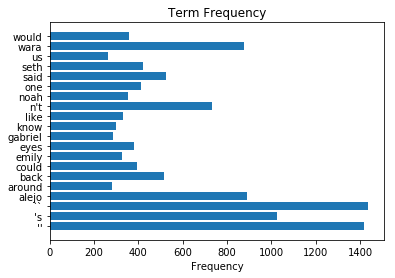

In [28]:
# Plot a barplot of the most frequent words in the text
plt.barh([it[0] for it in top20], [it[1] for it in top20])
plt.title('Term Frequency');
plt.xlabel('Frequency');

This looks potentially more relevant / useful. We could continue exploring this BoW model, but let's instead pivot now, and explore using TFIDF.

In [29]:
# Initialize a TFIDF object
tfidf = TfidfVectorizer(analyzer='word',
                        sublinear_tf=True,
                        max_features=5000,
                        tokenizer=nltk.word_tokenize)

In [30]:
# Apply the TFIDF transformation to our data
#  Note that this takes the sentences, and tokenizes them, then applies TFIDF
tfidf_books = tfidf.fit_transform(sents).toarray()

The TfidfVectorizer will calculate the inverse document frequency (IDF) for each word. 

The TFIDF is then calculated as the TF * IDF, working to down-weight frequently appearing words. This TFIDF is stored in 'tfidf_books' variable, which is a n_documents x n_words matrix that encodes the documents in a TFIDF representation. 

Let's first plot out the IDF for each of the top 10 most frequently appeared words (from the first analysis). 

In [31]:
# Get the IDF weights for the top 10 most common words
IDF_weights = [tfidf.idf_[tfidf.vocabulary_[token]] for token in top10_words]

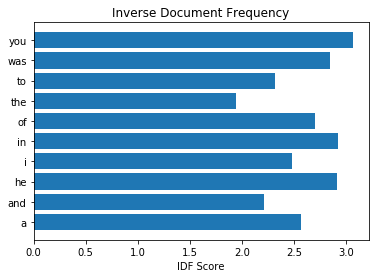

In [32]:
# Plot the IDF scores for the very common words
plt.barh(top10_words, IDF_weights)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

We compare the plot with the following plot that shows the words with top 10 highest IDF.

In [34]:
# Get the words with the highest IDF score
inds = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens = [list(tfidf.vocabulary_)[ind] for ind in inds]
top_IDF_scores = tfidf.idf_[inds]

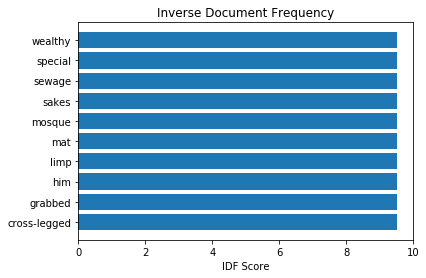

In [35]:
# Get the words with the highest IDF score
plt.barh(top_IDF_tokens, top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

As we can see, the frequently appearing words in the document get very low IDF scores, as compared to much rarer words. 

After TF-IDF, we successfully down-weight the frequently appearing words in the document. This allows us to represent a document by the words that are most unique to it, which can be a more useful way to represent text data. 